# Miniproject: User / logs

Продвинутый pandas и знакомство с визуализацией на python

### Задачи
1) Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

2) Какой клиент совершил больше всего успешных операций? (success == True)

3) С какой платформы осуществляется наибольшее количество успешных операций?

4) Какую платформу предпочитают премиумные клиенты?

5) Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

6) Постройте график распределения числа успешных операций

7) Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
### Описание данных
user_data:

- client – идентификатор пользователя
- premium – является ли клиент премиум
- age – возраст

logs:

- client – идентификатор пользователя
- success – результат (успех - 1, нет - 0)
- platform – платформа
- time – время в формате Unix

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_3/3_user_data.csv')
logs      = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/lesson_3/3_logs.csv')

Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

In [3]:
user_data.shape

(2954, 3)

In [4]:
logs.shape

(4500, 4)

In [5]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [7]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [8]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


Сколько уникальных значений принимает переменная platform?

In [9]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы через запятую и пробел в порядке возрастания

In [10]:
success_client = logs.query('success == True').client.value_counts()

In [11]:
max_num = success_client.max()

In [12]:
max_success_client = success_client.loc[success_client == max_num]

In [13]:
max_success_client.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

С какой платформы осуществляется наибольшее количество успешных операций?

In [14]:
logs.query('success == True').platform.value_counts().idxmax()

'phone'

Объединим датасеты:

In [15]:
user_logs = user_data.merge(logs, on='client', how='inner')

Какая платформа наиболее популярна среди премиумных клиентов?

In [16]:
user_logs.query('premium == True').value_counts('platform').idxmax() 

'phone'

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум)

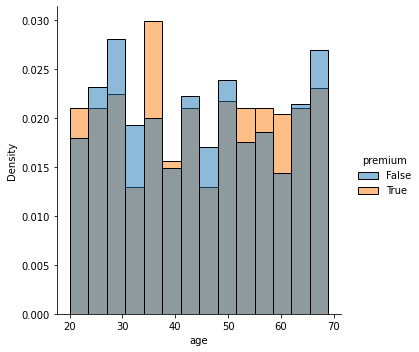

In [17]:
sns.displot(data = user_logs, x = 'age', hue = 'premium', kde = False, stat = 'density', common_norm = False, bins = 14)

Постройте график распределения числа успешных операций

In [18]:
success_counts = user_logs.query('success == True').client.value_counts()

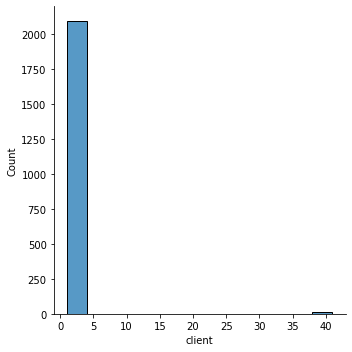

In [19]:
sns.displot(success_counts, kde=False)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста

Клиенты какого возраста совершили наибольшее количество успешных действий?

In [20]:
success_comp = user_logs.query('success == True and platform == "computer"')  

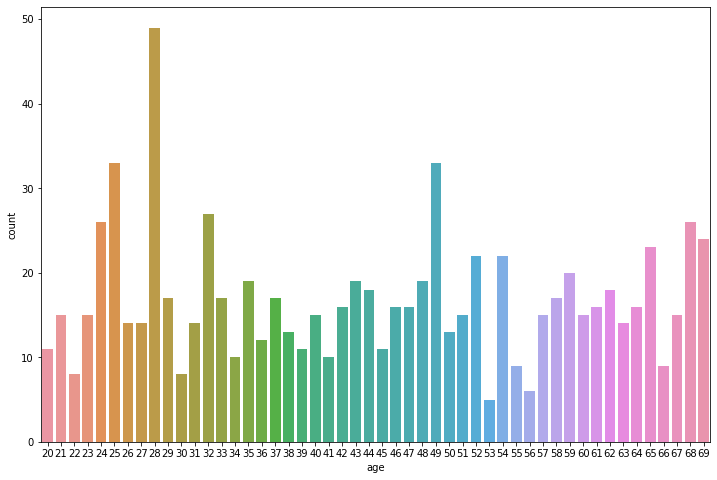

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x = 'age', data = success_comp)